In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8)

movies_df = pd.read_csv(r'C:\Users\Dell\Downloads\archive\movies.csv')

In [2]:
# size of data
movies_df.shape

(7668, 15)

In [3]:
# look at first 10 row from data
movies_df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [5]:
movies_df.votes[movies_df.rating == 'R'].value_counts()

11000.0     59
14000.0     56
21000.0     52
15000.0     52
13000.0     51
            ..
474000.0     1
415.0        1
749000.0     1
838.0        1
322.0        1
Name: votes, Length: 627, dtype: int64

In [6]:
# let's see if there is missing data
for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# filling the mean data in place of missing values in columns:
movies_df['gross'] = movies_df['gross'].fillna(movies_df['gross'].mean())
movies_df['runtime'] = movies_df['runtime'].fillna(movies_df['runtime'].mean())
movies_df['budget'] = movies_df['budget'].fillna(movies_df['budget'].mean())
movies_df['votes'] = movies_df['votes'].fillna(movies_df['votes'].mean())
movies_df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
# Data types of csv data
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# converting the data types of some columns:
movies_df['budget'] =movies_df['budget'].astype('int64')
movies_df['votes'] =movies_df['votes'].astype('int64')
movies_df['runtime'] =movies_df['runtime'].astype('int64')

In [25]:
movies_df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [27]:
for i in movies_df['rating'].unique():
    if(i=='R'):
        stars_wih_R_rating = movies_df.star[movies_df['rating']==i]
        print(stars_wih_R_rating)



0       Jack Nicholson
1       Brooke Shields
4          Chevy Chase
5         Betsy Palmer
6         John Belushi
             ...      
7646    Elisabeth Moss
7648        Will Smith
7653      Shea Whigham
7658       Dan Belcher
7661      Nicky Whelan
Name: star, Length: 3697, dtype: object


In [28]:
# sort by gross descending order:
movies_df.sort_values(by=['gross'],inplace=False,ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1.670728e+09,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1.670516e+09,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1.518816e+09,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1.515341e+09,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1.450027e+09,Walt Disney Animation Studios,103


In [29]:
pd.set_option('display.max_rows',None)

In [30]:
movies_df.tail(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,7.850054e+07,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,7.850054e+07,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,7.850054e+07,Embi Productions,107
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,88108,James Randall,James Randall,Christina Roz,United States,15000,7.850054e+07,NaN,120
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,35589876,7.850054e+07,PK 65 Films,102


In [31]:
# Drop any duplicates:
movies_df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [32]:
# Budget high correlation
# copany high correlation

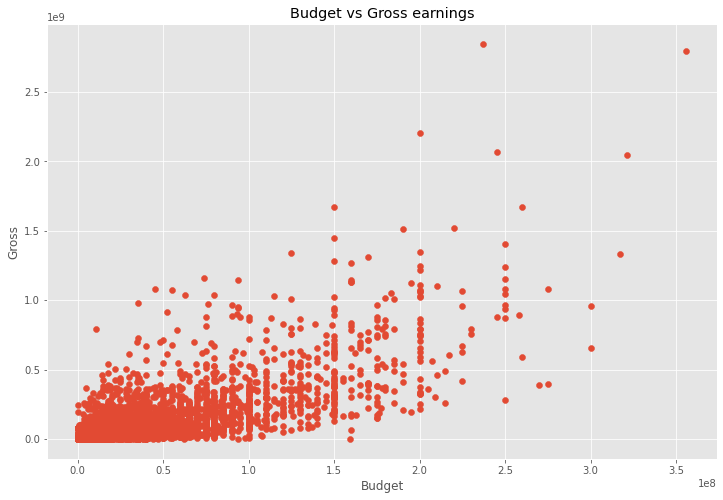

In [33]:
# Scatter plot with budget vs gross
  
plt.scatter(x=movies_df['budget'],y=movies_df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross');

In [34]:
movies_df.tail(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,7.850054e+07,Notis Studio,78
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,1.326600e+04,Roxwell Films,87
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,35589876,7.850054e+07,Abominable Pictures,90
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,88108,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,7.850054e+07,Dow Jazz Films,121
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,88108,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,7.850054e+07,NaN,90
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,7.850054e+07,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,7.850054e+07,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,7.850054e+07,Embi Productions,107
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,88108,James Randall,James Randall,Christina Roz,United States,15000,7.850054e+07,NaN,120
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,35589876,7.850054e+07,PK 65 Films,102


<AxesSubplot:xlabel='budget', ylabel='gross'>

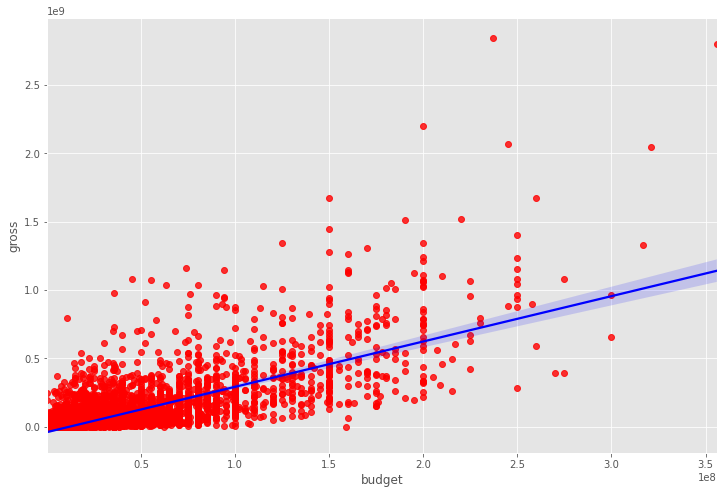

In [35]:
# plot plot Budget vs Gross using seaborn

sns.regplot(x='budget',y='gross',data=movies_df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [36]:
#Let's look at correlations

In [37]:
movies_df.corr(method='pearson')#kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222810,0.265578,0.252042,0.120758
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399384
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309168
budget,0.265578,0.064554,0.421007,1.000000,0.711270,0.265289
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120758,0.399384,0.309168,0.265289,0.241336,1.000000


In [38]:
#high correlation between budget and gross
# I was right

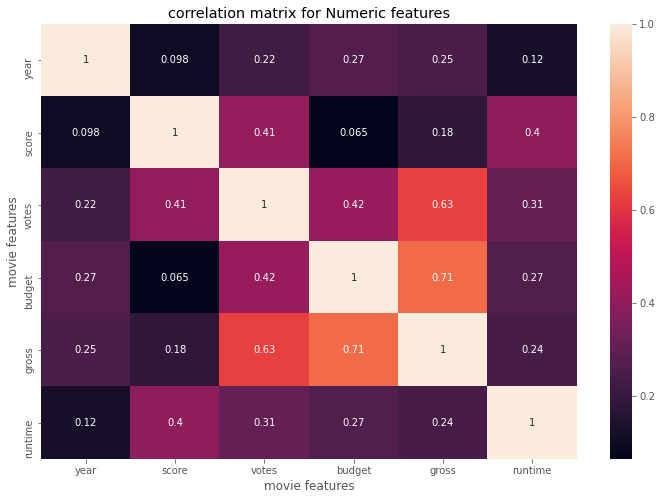

In [39]:
correlation_matrix =movies_df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation matrix for Numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()                                   


In [40]:
# Look at company
movies_df.sort_values(by='budget',inplace=False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1.332699e+09,Walt Disney Pictures,152
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,9.609965e+08,Walt Disney Pictures,169
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,6.579270e+08,Warner Bros.,120
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,"December 20, 2019 (United States)",6.5,394000,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1.078233e+09,Walt Disney Pictures,141
7261,Solo: A Star Wars Story,PG-13,Action,2018,"May 25, 2018 (United States)",6.9,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,3.929248e+08,Lucasfilm,135
4870,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.0,274000,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,3.910812e+08,Warner Bros.,154
5658,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.7,417000,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,5.924628e+08,Walt Disney Animation Studios,100
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1.670728e+09,Walt Disney Pictures,118


In [41]:
numerizedall_df = movies_df

for col_name in numerizedall_df.columns:
    if(numerizedall_df[col_name].dtype=='object'):
        numerizedall_df[col_name]=numerizedall_df[col_name].astype('category')
        numerizedall_df[col_name]=numerizedall_df[col_name].cat.codes
numerizedall_df.head(10)    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772.0,2319,146
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106.0,731,104
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067.0,1540,124
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539.0,1812,88
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344.0,1777,98
5,2109,6,10,1980,2502,6.4,123000,2528,4362,241,55,550000,39754601.0,1812,95
6,5574,6,0,1980,1771,7.9,188000,1412,838,1277,55,27000000,115229890.0,2281,133
7,4436,6,3,1980,699,8.2,330000,1829,1769,2240,55,18000000,23402427.0,631,129
8,5281,4,0,1980,1753,6.8,101000,2306,1979,877,55,54000000,108185706.0,883,127
9,6213,6,3,1980,2286,7.0,10000,2864,423,589,55,10000000,15795189.0,2272,100


In [42]:
numerizedall_df['company'].dtype

dtype('int16')

In [50]:
movies_df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4394,7372,5,6,2003,1992,6.1,18000,987,1508,510,6,20000000,8564586.0,1713,100
3955,2900,1,2,2001,739,6.0,32000,1360,2074,618,55,30000000,102992536.0,1812,82
3141,5597,6,6,1997,1367,7.0,20000,1312,2017,545,55,35589876,16534578.0,2281,113
889,2122,6,10,1986,2968,6.7,24000,2670,1582,1167,55,4500000,1261000.0,945,85
1088,6310,5,0,1987,333,7.0,30000,889,3919,112,55,12000000,3769990.0,2161,79
6830,7025,3,0,2015,496,6.7,27000,887,276,1947,6,35589876,67069.0,898,93
6885,5911,6,5,2016,3092,6.5,176000,2704,1310,759,55,45000000,173185859.0,889,112
3946,603,5,4,2001,2840,6.5,66000,211,1599,333,55,75000000,67631903.0,1637,123
7334,4208,6,0,2018,3391,6.5,60000,2238,636,1183,17,25000000,53918723.0,2004,101
7185,4966,6,0,2017,1169,5.6,31000,206,184,1104,55,30000000,32917353.0,1771,95


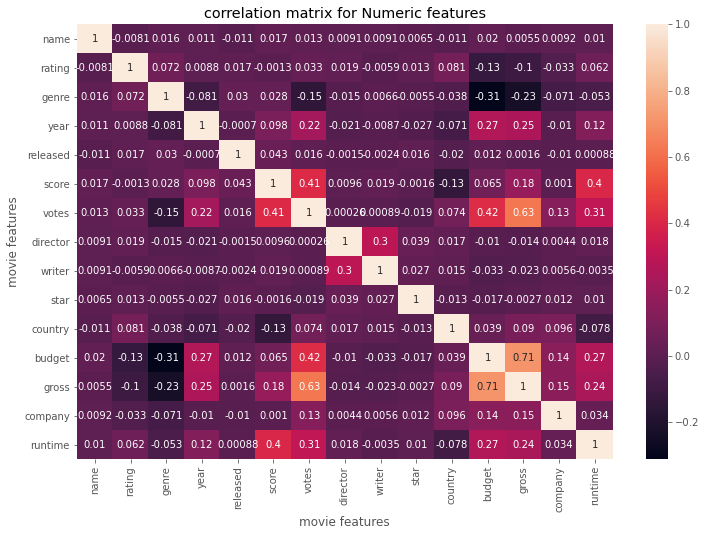

In [44]:
correlation_matrix =numerizedall_df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation matrix for Numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()           

In [45]:
numerizedall_df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013086,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010386
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033127,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062057
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145276,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052701
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222810,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120758
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016094,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000877
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399384
votes,0.013086,0.033127,-0.145276,0.222810,0.016094,0.409182,1.000000,0.000260,0.000891,-0.019277,0.073622,0.421007,0.628713,0.133129,0.309168
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017623
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000891,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003512
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019277,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010169


In [46]:
correlation_nat = numerizedall_df.corr()
corr_pairs = correlation_nat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013086
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020368
          gross       0.005466
          company     0.009211
          runtime     0.010386
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033127
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.126046
          gross      -0.102116
          company    -0.032943
          runtime     0.062057
genre     name        0.016355
          rating      0.072423
        

In [47]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.310566
genre     budget     -0.310566
gross     genre      -0.230267
genre     gross      -0.230267
votes     genre      -0.145276
genre     votes      -0.145276
score     country    -0.133348
country   score      -0.133348
rating    budget     -0.126046
budget    rating     -0.126046
gross     rating     -0.102116
rating    gross      -0.102116
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078287
runtime   country    -0.078287
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052701
genre     runtime    -0.052701
          country    -0.037615
country   genre      -0.037615
writer    budget     -0.033216
budget    writer     -0.033216
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
gross     writer     -0.023210
writer    gross      -0.023210
director

In [48]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.628713
votes     gross       0.628713
budget    gross       0.711270
gross     budget      0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [49]:
# votes and gross has highest correlation in grosss earnings
#company has low correlation 
#I was wrong